# <font color='blue'>Data Science Academy Big Data Real-Time Analytics com Python e Spark</font>

# <font color='blue'>Capítulo 7</font>

****** Este Jupyter Notebook foi atualizado para a versão 3.6.1. da Linguagem Python em 13/06/2017 ******

# Spark SQL

O Spark SQL é usado para acessar dados estruturados com Spark.

#### Acesse http://localhost:4040 sempre que quiser acompanhar a execução dos jobs. 
#### Pacotes adicionais podem ser encontrados aqui: https://spark-packages.org/ (usaremos um destes pacotes para conexão com o MongoDB).

## Spark SQL e RDD's

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import Row

In [2]:
print(sc)

In [3]:
# Spark Session - usada quando se trabalha com Dataframes no Spark
spSession = SparkSession.builder.master("local").appName("DSA-SparkSQL").config("spark.some.config.option", "some-value").getOrCreate()

In [4]:
# Criando o SQL Context para trabalhar com Spark SQL
sqlContext = SQLContext(sc)

In [5]:
# Importando o arquivo e criando um RDD
linhasRDD1 = sc.textFile("carros.csv")

In [6]:
linhasRDD1.count()

198

In [7]:
# Removendo a primeira linha - Transformação 1
linhasRDD2 = linhasRDD1.filter(lambda x: "FUELTYPE" not in x)

In [8]:
linhasRDD2.count()

197

In [9]:
# Dividindo o conjunto de dados em colunas - Transformação 2
linhasRDD3 = linhasRDD2.map(lambda line: line.split(","))

In [10]:
# Dividindo o conjunto de dados em colunas - Transformação 3
linhasRDD4 = linhasRDD3.map(lambda p: Row(make = p[0], body = p[4], hp = int(p[7])))

In [11]:
?Row

In [12]:
linhasRDD4.collect()

[Row(body='hatchback', hp=69, make='subaru'),
 Row(body='hatchback', hp=48, make='chevrolet'),
 Row(body='hatchback', hp=68, make='mazda'),
 Row(body='hatchback', hp=62, make='toyota'),
 Row(body='hatchback', hp=68, make='mitsubishi'),
 Row(body='hatchback', hp=60, make='honda'),
 Row(body='sedan', hp=69, make='nissan'),
 Row(body='hatchback', hp=68, make='dodge'),
 Row(body='hatchback', hp=68, make='plymouth'),
 Row(body='hatchback', hp=68, make='mazda'),
 Row(body='hatchback', hp=68, make='mitsubishi'),
 Row(body='hatchback', hp=68, make='dodge'),
 Row(body='hatchback', hp=68, make='plymouth'),
 Row(body='hatchback', hp=70, make='chevrolet'),
 Row(body='hatchback', hp=62, make='toyota'),
 Row(body='hatchback', hp=68, make='dodge'),
 Row(body='hatchback', hp=58, make='honda'),
 Row(body='hatchback', hp=62, make='toyota'),
 Row(body='hatchback', hp=76, make='honda'),
 Row(body='sedan', hp=70, make='chevrolet'),
 Row(body='sedan', hp=69, make='nissan'),
 Row(body='hatchback', hp=68, mak

In [13]:
# Criando um dataframe a partir do RDD
linhasDF = spSession.createDataFrame(linhasRDD4)

In [14]:
linhasDF.show()

+---------+---+----------+
|     body| hp|      make|
+---------+---+----------+
|hatchback| 69|    subaru|
|hatchback| 48| chevrolet|
|hatchback| 68|     mazda|
|hatchback| 62|    toyota|
|hatchback| 68|mitsubishi|
|hatchback| 60|     honda|
|    sedan| 69|    nissan|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 68|     mazda|
|hatchback| 68|mitsubishi|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 70| chevrolet|
|hatchback| 62|    toyota|
|hatchback| 68|     dodge|
|hatchback| 58|     honda|
|hatchback| 62|    toyota|
|hatchback| 76|     honda|
|    sedan| 70| chevrolet|
+---------+---+----------+
only showing top 20 rows



In [15]:
type(linhasDF)

pyspark.sql.dataframe.DataFrame

In [16]:
linhasDF.select("*").show()

+---------+---+----------+
|     body| hp|      make|
+---------+---+----------+
|hatchback| 69|    subaru|
|hatchback| 48| chevrolet|
|hatchback| 68|     mazda|
|hatchback| 62|    toyota|
|hatchback| 68|mitsubishi|
|hatchback| 60|     honda|
|    sedan| 69|    nissan|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 68|     mazda|
|hatchback| 68|mitsubishi|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 70| chevrolet|
|hatchback| 62|    toyota|
|hatchback| 68|     dodge|
|hatchback| 58|     honda|
|hatchback| 62|    toyota|
|hatchback| 76|     honda|
|    sedan| 70| chevrolet|
+---------+---+----------+
only showing top 20 rows



In [17]:
linhasDF.orderBy("make").show()

+-----------+---+-----------+
|       body| hp|       make|
+-----------+---+-----------+
|  hatchback|154|alfa-romero|
|convertible|111|alfa-romero|
|convertible|111|alfa-romero|
|      sedan|110|       audi|
|      sedan|115|       audi|
|      sedan|110|       audi|
|      wagon|110|       audi|
|      sedan|140|       audi|
|      sedan|102|       audi|
|      sedan|101|        bmw|
|      sedan|101|        bmw|
|      sedan|121|        bmw|
|      sedan|121|        bmw|
|      sedan|182|        bmw|
|      sedan|182|        bmw|
|      sedan|121|        bmw|
|      sedan|182|        bmw|
|      sedan| 70|  chevrolet|
|  hatchback| 70|  chevrolet|
|  hatchback| 48|  chevrolet|
+-----------+---+-----------+
only showing top 20 rows



In [18]:
# Registrando o dataframe como uma Temp Table
linhasDF.createOrReplaceTempView("linhasTB")

In [19]:
# Executando queries SQL ANSI
spSession.sql("select * from linhasTB where make = 'nissan'").show()

+---------+---+------+
|     body| hp|  make|
+---------+---+------+
|    sedan| 69|nissan|
|    sedan| 69|nissan|
|    sedan| 69|nissan|
|    sedan| 55|nissan|
|    sedan| 69|nissan|
|    wagon| 69|nissan|
|    sedan| 69|nissan|
|hatchback| 69|nissan|
|    wagon| 69|nissan|
|  hardtop| 69|nissan|
|hatchback| 97|nissan|
|    sedan| 97|nissan|
|    sedan|152|nissan|
|    sedan|152|nissan|
|    wagon|152|nissan|
|hatchback|160|nissan|
|hatchback|160|nissan|
|hatchback|200|nissan|
+---------+---+------+



In [20]:
# Executando queries SQL ANSI
spSession.sql("select make, body, avg(hp) from linhasTB group by make, body").show()

+-------------+-----------+-----------------+
|         make|       body|          avg(hp)|
+-------------+-----------+-----------------+
|       nissan|      wagon|96.66666666666667|
|       subaru|      sedan|             90.2|
|     plymouth|      sedan|             68.0|
|        dodge|  hatchback|             90.2|
|       nissan|      sedan|             89.0|
|        honda|      sedan|             89.8|
|   mitsubishi|  hatchback|            105.0|
|        mazda|      sedan|82.66666666666667|
|  alfa-romero|convertible|            111.0|
|mercedes-benz|convertible|            155.0|
|     plymouth|      wagon|             88.0|
|mercedes-benz|      wagon|            123.0|
|        isuzu|  hatchback|             90.0|
|       toyota|convertible|            116.0|
|        mazda|  hatchback|             89.4|
|    chevrolet|      sedan|             70.0|
|      mercury|  hatchback|            175.0|
|      porsche|  hatchback|            143.0|
|        honda|      wagon|       

## Spark SQL e Arquivos CSV

In [21]:
carrosDF = spSession.read.csv("carros.csv", header = True)

In [22]:
type(carrosDF)

pyspark.sql.dataframe.DataFrame

In [23]:
carrosDF.show()

+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|      MAKE|FUELTYPE|ASPIRE|DOORS|     BODY|DRIVE|CYLINDERS| HP| RPM|MPG-CITY|MPG-HWY|PRICE|
+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|    subaru|     gas|   std|  two|hatchback|  fwd|     four| 69|4900|      31|     36| 5118|
| chevrolet|     gas|   std|  two|hatchback|  fwd|    three| 48|5100|      47|     53| 5151|
|     mazda|     gas|   std|  two|hatchback|  fwd|     four| 68|5000|      30|     31| 5195|
|    toyota|     gas|   std|  two|hatchback|  fwd|     four| 62|4800|      35|     39| 5348|
|mitsubishi|     gas|   std|  two|hatchback|  fwd|     four| 68|5500|      37|     41| 5389|
|     honda|     gas|   std|  two|hatchback|  fwd|     four| 60|5500|      38|     42| 5399|
|    nissan|     gas|   std|  two|    sedan|  fwd|     four| 69|5200|      31|     37| 5499|
|     dodge|     gas|   std|  two|hatchback|  fwd|     four| 68|5500| 

In [24]:
# Registrando o dataframe como uma Temp Table
carrosDF.createOrReplaceTempView("carrosTB")

In [25]:
# Executando queries SQL ANSI
spSession.sql("select make, hp, price from carrosTB where CYLINDERS = 'three'").show()

+---------+---+-----+
|     make| hp|price|
+---------+---+-----+
|chevrolet| 48| 5151|
+---------+---+-----+



In [26]:
carrosTT = spSession.sql("select make, hp, price from carrosTB where CYLINDERS = 'three'")

In [27]:
carrosTT.show()

+---------+---+-----+
|     make| hp|price|
+---------+---+-----+
|chevrolet| 48| 5151|
+---------+---+-----+



## Aplicando Machine Learning

In [28]:
# Carregando o arquivo CSV e mantendo o objeto em cache
carros = sc.textFile("carros.csv")
carros.cache()

carros.csv MapPartitionsRDD[45] at textFile at NativeMethodAccessorImpl.java:-2

In [29]:
# Remove a primeira linha (header)
primeiraLinha = carros.first()
linhas = carros.filter(lambda x: x != primeiraLinha)
linhas.count()

197

In [30]:
# Importando função row e função vectors
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
import math

In [31]:
# Convertendo para um vetor de linhas
def transformToNumeric( inputStr) :
    attList = inputStr.split(",")
    doors = 1.0 if attList[3] == "two" else 2.0
    body = 1.0 if attList[4] == "sedan" else 2.0 
       
    # Filtrando colunas não necessárias nesta etapa
    valores = Row(DOORS = doors, BODY = float(body), HP = float(attList[7]), RPM = float(attList[8]), MPG = float(attList[9]))
    return valores

In [32]:
autoMap = linhas.map(transformToNumeric)
autoMap.persist()
autoMap.collect()

[Row(BODY=2.0, DOORS=1.0, HP=69.0, MPG=31.0, RPM=4900.0),
 Row(BODY=2.0, DOORS=1.0, HP=48.0, MPG=47.0, RPM=5100.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=30.0, RPM=5000.0),
 Row(BODY=2.0, DOORS=1.0, HP=62.0, MPG=35.0, RPM=4800.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=37.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=60.0, MPG=38.0, RPM=5500.0),
 Row(BODY=1.0, DOORS=1.0, HP=69.0, MPG=31.0, RPM=5200.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=37.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=37.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=31.0, RPM=5000.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=31.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=2.0, HP=68.0, MPG=31.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=2.0, HP=68.0, MPG=31.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=70.0, MPG=38.0, RPM=5400.0),
 Row(BODY=2.0, DOORS=1.0, HP=62.0, MPG=31.0, RPM=4800.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=31.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=58.0, MPG=49.0, RPM=4800.0),
 Row(BODY=2.0,

In [33]:
# Criando o Dataframe
carrosDf = spSession.createDataFrame(autoMap)
carrosDf.show()

+----+-----+----+----+------+
|BODY|DOORS|  HP| MPG|   RPM|
+----+-----+----+----+------+
| 2.0|  1.0|69.0|31.0|4900.0|
| 2.0|  1.0|48.0|47.0|5100.0|
| 2.0|  1.0|68.0|30.0|5000.0|
| 2.0|  1.0|62.0|35.0|4800.0|
| 2.0|  1.0|68.0|37.0|5500.0|
| 2.0|  1.0|60.0|38.0|5500.0|
| 1.0|  1.0|69.0|31.0|5200.0|
| 2.0|  1.0|68.0|37.0|5500.0|
| 2.0|  1.0|68.0|37.0|5500.0|
| 2.0|  1.0|68.0|31.0|5000.0|
| 2.0|  1.0|68.0|31.0|5500.0|
| 2.0|  2.0|68.0|31.0|5500.0|
| 2.0|  2.0|68.0|31.0|5500.0|
| 2.0|  1.0|70.0|38.0|5400.0|
| 2.0|  1.0|62.0|31.0|4800.0|
| 2.0|  1.0|68.0|31.0|5500.0|
| 2.0|  1.0|58.0|49.0|4800.0|
| 2.0|  2.0|62.0|31.0|4800.0|
| 2.0|  1.0|76.0|30.0|6000.0|
| 1.0|  2.0|70.0|38.0|5400.0|
+----+-----+----+----+------+
only showing top 20 rows



In [34]:
# Aplicando técnicas de normalização e escala
summStats = carrosDf.describe().toPandas()
medias = summStats.iloc[1,1:5].values.tolist()
desvios_padroes = summStats.iloc[2,1:5].values.tolist()

In [35]:
# Inserindo a média e o desvio padrão em uma variável do tipo broadcast 
bcMedias = sc.broadcast(medias)
bcDesviosP = sc.broadcast(desvios_padroes)

In [36]:
def centerAndScale(inRow) :
    global bcMedias
    global bcDesviosP
    
    meanArray = bcMedias.value
    stdArray = bcDesviosP.value

    retArray = []
    for i in range(len(meanArray)):
        retArray.append( (float(inRow[i]) - float(meanArray[i])) / float(stdArray[i]) )
    return Vectors.dense(retArray)

In [37]:
csAuto = carrosDf.rdd.map(centerAndScale)
csAuto.collect()

[DenseVector([0.9337, -1.145, -0.9194, 0.9083]),
 DenseVector([0.9337, -1.145, -1.4773, 3.3936]),
 DenseVector([0.9337, -1.145, -0.9459, 0.753]),
 DenseVector([0.9337, -1.145, -1.1053, 1.5297]),
 DenseVector([0.9337, -1.145, -0.9459, 1.8403]),
 DenseVector([0.9337, -1.145, -1.1585, 1.9956]),
 DenseVector([-1.0656, -1.145, -0.9194, 0.9083]),
 DenseVector([0.9337, -1.145, -0.9459, 1.8403]),
 DenseVector([0.9337, -1.145, -0.9459, 1.8403]),
 DenseVector([0.9337, -1.145, -0.9459, 0.9083]),
 DenseVector([0.9337, -1.145, -0.9459, 0.9083]),
 DenseVector([0.9337, 0.869, -0.9459, 0.9083]),
 DenseVector([0.9337, 0.869, -0.9459, 0.9083]),
 DenseVector([0.9337, -1.145, -0.8928, 1.9956]),
 DenseVector([0.9337, -1.145, -1.1053, 0.9083]),
 DenseVector([0.9337, -1.145, -0.9459, 0.9083]),
 DenseVector([0.9337, -1.145, -1.2116, 3.7043]),
 DenseVector([0.9337, 0.869, -1.1053, 0.9083]),
 DenseVector([0.9337, -1.145, -0.7334, 0.753]),
 DenseVector([-1.0656, 0.869, -0.8928, 1.9956]),
 DenseVector([-1.0656, -

In [38]:
# Criando um Spark Dataframe
autoRows = csAuto.map(lambda f:Row(features = f))
autoDf = spSession.createDataFrame(autoRows)
autoDf.select("features").show(10)

+--------------------+
|            features|
+--------------------+
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[-1.0656035495158...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
+--------------------+
only showing top 10 rows



In [39]:
# Importando o algoritmo K-Means para clusterização
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k = 3, seed = 1)
modelo = kmeans.fit(autoDf)
previsoes = modelo.transform(autoDf)
previsoes.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[-1.0656035495158...|         1|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[0.93367168148051...|         2|
|[-1.0656035495158...|         1|
+--------------------+----------+
only showing top 20 rows



In [40]:
# Plot dos resultados
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [41]:
def unstripData(instr) :
    return ( instr["prediction"], instr["features"][0], instr["features"][1],instr["features"][2],instr["features"][3])

In [42]:
# Organizando os dados para o Plot
unstripped = previsoes.rdd.map(unstripData)
predList = unstripped.collect()
predPd = pd.DataFrame(predList)

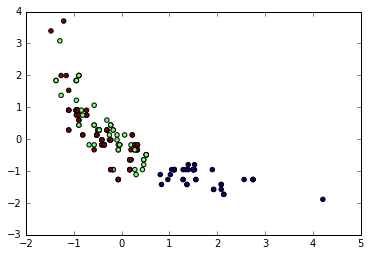

In [43]:
plt.cla()
plt.scatter(predPd[3], predPd[4], c = predPd[0])

## Spark SQL e Arquivos JSON

Neste site você pode validar a estrutura de um arquivo JSON: http://jsonlint.com/

In [44]:
# Importando o arquivo JSON
funcDF = spSession.read.json("funcionarios.json")

In [45]:
funcDF.show()

+------+-----+----------------+-------+----+
|deptid|idade|            nome|salario|sexo|
+------+-----+----------------+-------+----+
|  1000|   42|   Josias Rebelo|   7000|   m|
|  2000|   50|Mauricio Gonheim|   9500|   m|
|  1000|   36| Bruno Velasquez|   6700|   m|
|  1000|   41|  Ananda Tavares|   9300|   f|
|  2000|   34|     Carlos Maia|   5500|   m|
+------+-----+----------------+-------+----+



In [46]:
funcDF.printSchema()

root
 |-- deptid: string (nullable = true)
 |-- idade: string (nullable = true)
 |-- nome: string (nullable = true)
 |-- salario: string (nullable = true)
 |-- sexo: string (nullable = true)



In [47]:
type(funcDF)

pyspark.sql.dataframe.DataFrame

In [48]:
# Operações com Dataframe Spark SQL - select()
funcDF.select("nome").show()

+----------------+
|            nome|
+----------------+
|   Josias Rebelo|
|Mauricio Gonheim|
| Bruno Velasquez|
|  Ananda Tavares|
|     Carlos Maia|
+----------------+



In [49]:
# Operações com Dataframe Spark SQL - filter()
funcDF.filter(funcDF["idade"] == 50).show()

+------+-----+----------------+-------+----+
|deptid|idade|            nome|salario|sexo|
+------+-----+----------------+-------+----+
|  2000|   50|Mauricio Gonheim|   9500|   m|
+------+-----+----------------+-------+----+



In [50]:
# Operações com Dataframe Spark SQL - groupBy()
funcDF.groupBy("sexo").count().show()

+----+-----+
|sexo|count|
+----+-----+
|   m|    4|
|   f|    1|
+----+-----+



In [51]:
# Operações com Dataframe Spark SQL - groupBy()
funcDF.groupBy("deptid").agg({"salario": "avg", "idade": "max"}).show()

+------+----------+-----------------+
|deptid|max(idade)|     avg(salario)|
+------+----------+-----------------+
|  2000|        50|           7500.0|
|  1000|        42|7666.666666666667|
+------+----------+-----------------+



In [52]:
# Registrando o dataframe como uma Temp Table
funcDF.registerTempTable("funcTB")

In [53]:
# Executando queries SQL ANSI
spSession.sql("select deptid, max(idade), avg(salario) from funcTB group by deptid").show()

+------+----------+----------------------------+
|deptid|max(idade)|avg(CAST(salario AS DOUBLE))|
+------+----------+----------------------------+
|  2000|        50|                      7500.0|
|  1000|        42|           7666.666666666667|
+------+----------+----------------------------+



## Temp Tables

In [54]:
# Registrando o dataframe como temp Table
funcDF.createOrReplaceTempView("funcTB")

In [55]:
spSession.sql("select * from funcTB where salario = 6700").show()

+------+-----+---------------+-------+----+
|deptid|idade|           nome|salario|sexo|
+------+-----+---------------+-------+----+
|  1000|   36|Bruno Velasquez|   6700|   m|
+------+-----+---------------+-------+----+



In [56]:
# Criando Temp Table
sqlContext.registerDataFrameAsTable(funcDF, "funcTB2")

In [57]:
type(funcTB2)

NameError: name 'funcTB2' is not defined

In [58]:
# Persistindo a Temp Table 
funcTB3 = spSession.table("funcTB2")

In [59]:
type(funcTB3)

pyspark.sql.dataframe.DataFrame

In [60]:
# Comparando o Dataframe com a tabela temporária criada
sorted(funcDF.collect()) == sorted(funcTB3.collect())

True

In [61]:
# Aplicando o filtro
sqlContext.registerDataFrameAsTable(funcDF, "funcTB2")
funcTB3 = spSession.table("funcTB2")
funcTB3.filter("idade = '42'").first()

Row(deptid='1000', idade='42', nome='Josias Rebelo', salario='7000', sexo='m')

In [ ]:
# Drop Temp Table
sqlContext.dropTempTable("funcTB2")

## Banco de Dados Relacional

Extraindo Dados do MySQL. Primeiro precisamos baixar o driver JDBC. Haverá um driver JDBC para cada banco de dados que você conectar (Oracle, SQL Server, etc...)

1- Download do Driver JDBC para o MySQL: http://dev.mysql.com/downloads/connector/j/

2- Baixar o arquivo .zip

3- Descompactar o arquivo e copiar o arquivo mysql-connector-java-5.1.39-bin.jar para a pasta /opt/Spark/jars

In [62]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [72]:
mysql_df = spSession.read.format("jdbc").options(
    url = "jdbc:mysql://localhost/carros",
    driver = "com.mysql.jdbc.Driver",
    dbtable = "carrostb",
    user = "root",
    password = "dsa1234").load()

In [73]:
mysql_df.show()

+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|      MAKE|FUELTYPE|ASPIRE|DOORS|     BODY|DRIVE|CYLINDERS| HP| RPM|MPG-CITY|MPG-HWY|PRICE|
+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|    subaru|     gas|   std|  two|hatchback|  fwd|     four| 69|4900|      31|     36| 5118|
| chevrolet|     gas|   std|  two|hatchback|  fwd|    three| 48|5100|      47|     53| 5151|
|     mazda|     gas|   std|  two|hatchback|  fwd|     four| 68|5000|      30|     31| 5195|
|    toyota|     gas|   std|  two|hatchback|  fwd|     four| 62|4800|      35|     39| 5348|
|mitsubishi|     gas|   std|  two|hatchback|  fwd|     four| 68|5500|      37|     41| 5389|
|     honda|     gas|   std|  two|hatchback|  fwd|     four| 60|5500|      38|     42| 5399|
|    nissan|     gas|   std|  two|    sedan|  fwd|     four| 69|5200|      31|     37| 5499|
|     dodge|     gas|   std|  two|hatchback|  fwd|     four| 68|5500| 

In [74]:
dataframe_mysql.registerTempTable("carrostb")

In [75]:
spSession.sql("select * from carrostb where hp = '68'").show()

+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|      MAKE|FUELTYPE|ASPIRE|DOORS|     BODY|DRIVE|CYLINDERS| HP| RPM|MPG-CITY|MPG-HWY|PRICE|
+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|     mazda|     gas|   std|  two|hatchback|  fwd|     four| 68|5000|      30|     31| 5195|
|mitsubishi|     gas|   std|  two|hatchback|  fwd|     four| 68|5500|      37|     41| 5389|
|     dodge|     gas|   std|  two|hatchback|  fwd|     four| 68|5500|      37|     41| 5572|
|  plymouth|     gas|   std|  two|hatchback|  fwd|     four| 68|5500|      37|     41| 5572|
|     mazda|     gas|   std|  two|hatchback|  fwd|     four| 68|5000|      31|     38| 6095|
|mitsubishi|     gas|   std|  two|hatchback|  fwd|     four| 68|5500|      31|     38| 6189|
|     dodge|     gas|   std| four|hatchback|  fwd|     four| 68|5500|      31|     38| 6229|
|  plymouth|     gas|   std| four|hatchback|  fwd|     four| 68|5500| 

## Banco de Dados Não-Relacional

https://spark-packages.org/package/Stratio/spark-mongodb

$SPARK_HOME/bin/pyspark --packages com.stratio.datasource:spark-mongodb_2.11:0.12.0

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [2]:
# Cria tabela temporária a partir de dados do MongoDB
spark.sql("CREATE TEMPORARY VIEW test_tb USING com.stratio.datasource.mongodb OPTIONS (host 'localhost:27017', database 'test_db', collection 'test_collection')")

DataFrame[]

In [3]:
# select na tabela temporária criada
spark.sql("SELECT * FROM test_tb").collect()

[Row(titulo='MongoDB Overview', _id='57d9f1b67a0a143422c5e6d1')]

In [4]:
# DataFrameReader
df = spark.read.format('com.stratio.datasource.mongodb').options(host='localhost:27017', database = 'test_db', collection = 'test_collection').load()

In [5]:
df.show()

+----------------+--------------------+
|          titulo|                 _id|
+----------------+--------------------+
|MongoDB Overview|57d9f1b67a0a14342...|
+----------------+--------------------+



In [6]:
# DataFrameWriter
df.select("titulo").write.format("com.stratio.datasource.mongodb").mode('overwrite').options(host = 'localhost:27017', database = 'test_db', collection = 'test_collection').save()

In [7]:
# DataFrameReader
dfView = spark.read.format('com.stratio.datasource.mongodb').options(host='localhost:27017', database='test_db', collection='test_collection').load()

In [8]:
dfView.show()

++
||
++
++



# Fim

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>